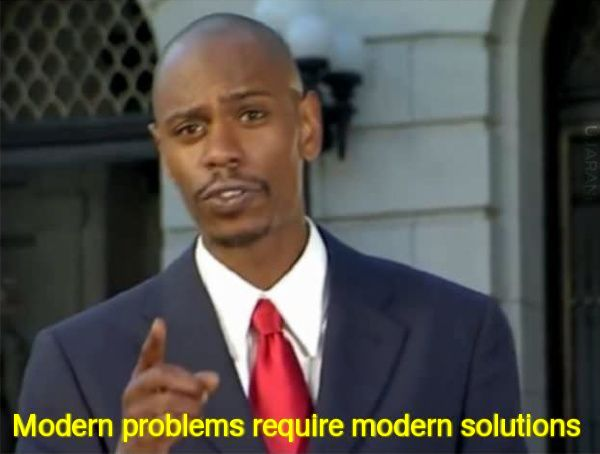

### Stanford NLP API for opinoin mining
[learn more](https://deepai.org/machine-learning-model/sentiment-analysis)

In [7]:
# sarcasm
import requests
r = requests.post(
    "https://api.deepai.org/api/sentiment-analysis",
    data={
        'text': 'i was killed by murder thanks your bonuses',
    },
    headers={'api-key': 'quickstart-QUdJIGlzIGNvbWluZy4uLi4K'}
)
print(r.json())

{'status': "Looks like you're enjoying our API. Want to keep using it? Sign up to get an API Key that's as unique as you are. It's free! https://deepai.org/"}


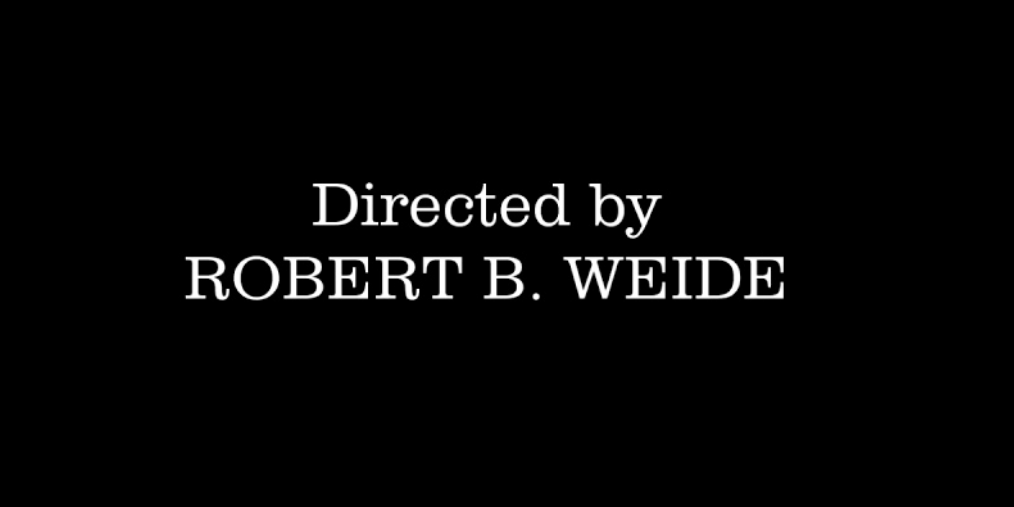

### Problem
----
Train model for your own and compare with Stanford NLP.

#### Pipline

1) clean and vectorize dataset <br>
2) train model <br>
3) get scores (f1, eccuracy etc) <br>
4) compare with same sentence

In [8]:
import collections
import nltk
import os
from sklearn import (
    datasets, model_selection, feature_extraction, linear_model
)

In [9]:
def extract_features(corpus):
    '''Extract TF-IDF features from corpus'''
    # vectorize means we turn non-numerical data into an array of numbers
    count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=nltk.word_tokenize,  # use the NLTK tokenizer
        stop_words='english',  # remove stop words
        min_df=1  # minimum document frequency, i.e. the word must appear more than once.
    )
    processed_corpus = count_vectorizer.fit_transform(corpus)
    processed_corpus = feature_extraction.text.TfidfTransformer().fit_transform(
        processed_corpus)

    return processed_corpus

In [11]:
import pandas as pd

In [12]:
data = pd.read_csv('train_tweets.csv').reset_index(drop=True).drop('id', axis=1)

In [15]:
data.head(10)

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
5,0,[2/2] huge fan fare and big talking before the...
6,0,@user camping tomorrow @user @user @user @use...
7,0,the next school year is the year for exams.ð...
8,0,we won!!! love the land!!! #allin #cavs #champ...
9,0,@user @user welcome here ! i'm it's so #gr...


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


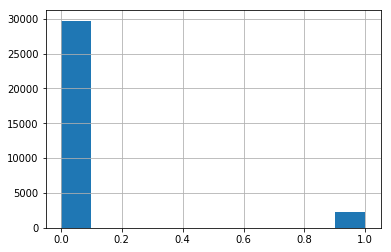

In [17]:
%matplotlib inline
data.label.hist()

In [18]:
tweet_tfidf = extract_features(data.tweet)

In [19]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    tweet_tfidf, data.label, test_size=0.30, random_state=42)

In [20]:
print(X_train[:1])

  (0, 15316)	0.3448843834504705
  (0, 31462)	0.35849567098312296
  (0, 20847)	0.35849567098312296
  (0, 37284)	0.3448843834504705
  (0, 39119)	0.35849567098312296
  (0, 38031)	0.31644096236957486
  (0, 29982)	0.2406146161251237
  (0, 37702)	0.26990366291577367
  (0, 37258)	0.17144088083835066
  (0, 44000)	0.1483642405895604
  (0, 1)	0.30703403531357465


In [57]:
# similar to nltk.NaiveBayesClassifier.train()
model = linear_model.LogisticRegression(class_weight='balanced', solver='sag')
model.fit(X_train, y_train)
print('Model performance: {}'.format(model.score(X_test, y_test)))

Model performance: 0.9381583063927417


A:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [43]:
help(linear_model.LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model.logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It can handle
 |  both dense and sparse input. Use C-ordered arrays or CSR matrices
 |  containing 64-bit floats for optimal performance; any other input format
 |  will be converted (and copied).
 |  
 |  The 'newton-cg', 'sag', and 'lbfgs' solve

In [58]:
y_pred = model.predict(X_test)

(array([8696.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         893.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

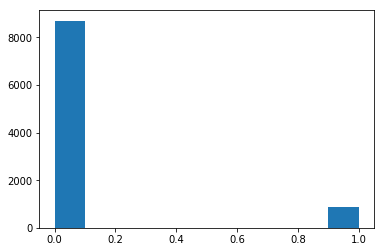

In [59]:
from matplotlib.pyplot import hist
hist(y_pred)

(array([8905.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         684.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

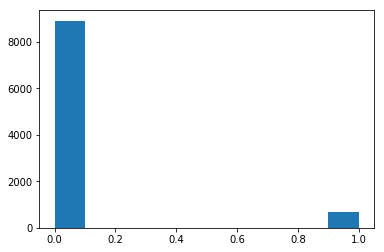

In [60]:
hist(y_test)

In [61]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.6239695624603678

baseline f1 = 0.6235

https://www.kaggle.com/ngyptr/python-nltk-sentiment-analysis